In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tdf = pd.read_csv("test.csv")

In [11]:
tdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
tdf.shape

(1459, 80)

In [13]:
tdf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

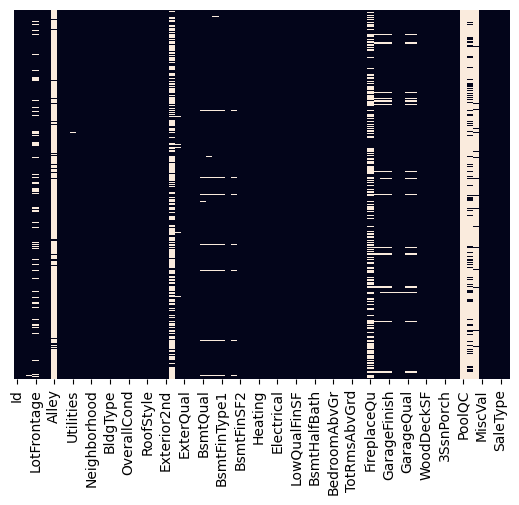

In [14]:
sns.heatmap(tdf.isnull(), yticklabels=False, cbar=False)

In [15]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## handling null values

In [16]:
tdf['LotFrontage']=tdf['LotFrontage'].fillna(tdf['LotFrontage'].mean())

In [17]:
tdf['MSZoning']=tdf['MSZoning'].fillna(tdf['MSZoning'].mode()[0])

In [18]:
tdf.shape

(1459, 80)

In [19]:
tdf.drop(['Alley'], axis=1, inplace=True)

In [20]:

tdf['BsmtCond']=tdf['BsmtCond'].fillna(tdf['BsmtCond'].mode()[0])
tdf['BsmtQual']=tdf['BsmtQual'].fillna(tdf['BsmtQual'].mode()[0])

In [21]:
tdf['FireplaceQu']=tdf['FireplaceQu'].fillna(tdf['FireplaceQu'].mode()[0])
tdf['GarageType']=tdf['GarageType'].fillna(tdf['GarageType'].mode()[0])

In [22]:
tdf.drop(['GarageYrBlt'],axis=1,inplace=True)

In [23]:
tdf.shape

(1459, 78)

In [24]:
tdf['GarageFinish']=tdf['GarageFinish'].fillna(tdf['GarageFinish'].mode()[0])
tdf['GarageQual']=tdf['GarageQual'].fillna(tdf['GarageQual'].mode()[0])
tdf['GarageCond']=tdf['GarageCond'].fillna(tdf['GarageCond'].mode()[0])

tdf.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [25]:
tdf.shape

(1459, 75)

In [26]:
tdf.drop(['Id'],axis=1,inplace=True)

In [27]:
tdf['MasVnrType']=tdf['MasVnrType'].fillna(tdf['MasVnrType'].mode()[0])
tdf['MasVnrArea']=tdf['MasVnrArea'].fillna(tdf['MasVnrArea'].mode()[0])

<Axes: >

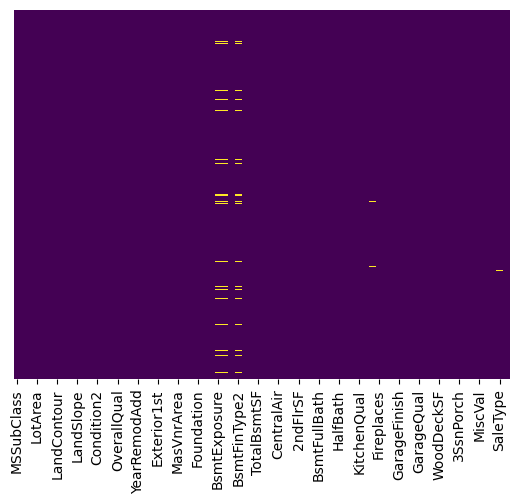

In [28]:
sns.heatmap(tdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
tdf['BsmtExposure']=tdf['BsmtExposure'].fillna(tdf['BsmtExposure'].mode()[0])

<Axes: >

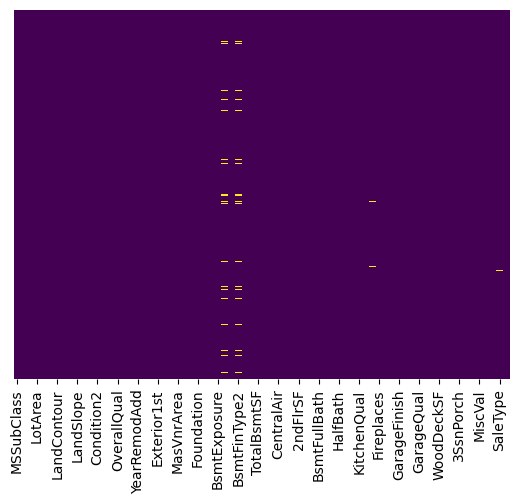

In [30]:
sns.heatmap(tdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
tdf['BsmtFinType2']=tdf['BsmtFinType2'].fillna(tdf['BsmtFinType2'].mode()[0])

In [32]:
tdf.loc[:, tdf.isnull().any()].head()

,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [33]:
tdf['Utilities']=tdf['Utilities'].fillna(tdf['Utilities'].mode()[0])
tdf['Exterior1st']=tdf['Exterior1st'].fillna(tdf['Exterior1st'].mode()[0])
tdf['Exterior2nd']=tdf['Exterior2nd'].fillna(tdf['Exterior2nd'].mode()[0])
tdf['BsmtFinType1']=tdf['BsmtFinType1'].fillna(tdf['BsmtFinType1'].mode()[0])
tdf['BsmtFinSF1']=tdf['BsmtFinSF1'].fillna(tdf['BsmtFinSF1'].mean())
tdf['BsmtFinSF2']=tdf['BsmtFinSF2'].fillna(tdf['BsmtFinSF2'].mean())
tdf['BsmtUnfSF']=tdf['BsmtUnfSF'].fillna(tdf['BsmtUnfSF'].mean())
tdf['TotalBsmtSF']=tdf['TotalBsmtSF'].fillna(tdf['TotalBsmtSF'].mean())
tdf['BsmtFullBath']=tdf['BsmtFullBath'].fillna(tdf['BsmtFullBath'].mode()[0])
tdf['BsmtHalfBath']=tdf['BsmtHalfBath'].fillna(tdf['BsmtHalfBath'].mode()[0])
tdf['KitchenQual']=tdf['KitchenQual'].fillna(tdf['KitchenQual'].mode()[0])
tdf['Functional']=tdf['Functional'].fillna(tdf['Functional'].mode()[0])
tdf['GarageCars']=tdf['GarageCars'].fillna(tdf['GarageCars'].mean())
tdf['GarageArea']=tdf['GarageArea'].fillna(tdf['GarageArea'].mean())
tdf['SaleType']=tdf['SaleType'].fillna(tdf['SaleType'].mode()[0])

In [34]:
tdf.shape

(1459, 74)

In [35]:
tdf.to_csv('handledtest.csv',index=False)